# Nilearn tutorial 1

## 1. Initialization and preparing the data

In [1]:
import nilearn
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 
import seaborn

### load() and get_data() using nibabel

In [3]:
haxby_ds1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/bold.nii')
haxby_maskvt_ds1 = nib.load('/home/farahana/Documents/dataset/Haxby2001/subj1/mask4_vt.nii')

### using niftimasker to mask the maskvt into sub1 bold.nii

In [4]:
from nilearn.input_data import NiftiMasker
haxby_maskvt_ds1_mask = NiftiMasker(haxby_maskvt_ds1)
haxby_maskedvt_ds1 = haxby_maskvt_ds1_mask.fit_transform(haxby_ds1)

### get the label or target or stimuli from labels.txt using np.recfromcsv

In [5]:
haxby_label1 = np.recfromcsv('/home/farahana/Documents/dataset/Haxby2001/subj1/labels.txt', delimiter=' ')

In [6]:
# separate the chunks and label
haxby_label1_label = haxby_label1['labels']
haxby_label1_chunks = haxby_label1['chunks']

### print the labels, shape of after niftimasker, shape of the labels

In [7]:
print (haxby_label1_label)
print (haxby_maskedvt_ds1.shape)
print (haxby_label1_label.shape)

[b'rest' b'rest' b'rest' ..., b'rest' b'rest' b'rest']
(1452, 577)
(1452,)


## 2. Building the simple Support vector Classification (SVC)

In [83]:
### cross validation
from sklearn.cross_validation import cross_val_score, KFold
cv = KFold(n=len(haxby_maskedvt_ds1), n_folds=10)

In [62]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel='linear')
svc_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
cv_score_SVC = cross_val_score(svc_classifier, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_SVC))

0.726594237128


In [84]:
### train and test splitting
from sklearn.cross_validation import train_test_split
haxby_bold1_train, haxby_bold1_test, haxby_label1_train, haxby_label1_test = train_test_split(haxby_maskedvt_ds1, haxby_label1_label, random_state = 30)

In [65]:
svc_classifier2 = SVC(kernel='linear')
svc_classifier2.fit(haxby_bold1_train, haxby_label1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
ts_score_SVC = svc_classifier2.score(haxby_bold1_test, haxby_label1_test)
print(np.mean(ts_score_SVC))

0.922865013774


## 3. Naive Bayes

In [112]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()

In [113]:
gnb1 = gnb_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)
cv_score_gnb = cross_val_score(gnb1, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_gnb))

0.361790269249


In [74]:
gnb2 = gnb_classifier.fit(haxby_bold1_train, haxby_label1_train)
ts_score_gnb = gnb2.score(haxby_bold1_test, haxby_label1_test) 
print(ts_score_gnb)

0.523415977961


In [75]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb_classifier = MultinomialNB()

In [78]:
mnb1 = mnb_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)
cv_score_mnb = cross_val_score(mnb1, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_mnb))

0.150845536136


In [79]:
mnb2 = mnb_classifier.fit(haxby_bold1_train, haxby_label1_train)
ts_score_mnb = mnb2.score(haxby_bold1_test, haxby_label1_test)
print(ts_score_mnb)

0.258953168044


## 4. nearest neighbors

In [86]:
# K-nearest neighbors (k=5)
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

In [87]:
knn1 = knn_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)
cv_score_knn = cross_val_score(knn1, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_knn))

0.368436466698


In [89]:
knn2 = knn_classifier.fit(haxby_bold1_train, haxby_label1_train)
ts_score_knn = knn2.score(haxby_bold1_test, haxby_label1_test) 
print(ts_score_knn)

0.801652892562


## 5. Decision Tree

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

In [92]:
dt1 = dt_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)
cv_score_dt = cross_val_score(dt1, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_dt))

0.399400094473


In [93]:
dt2 = dt_classifier.fit(haxby_bold1_train, haxby_label1_train)
ts_score_dt = dt2.score(haxby_bold1_test, haxby_label1_test) 
print(ts_score_dt)

0.523415977961


## 6. Ensemble Methods

In [94]:
# Bagging meta-estimator
from sklearn.ensemble import BaggingClassifier
bag_classifier = BaggingClassifier(knn_classifier)

In [95]:
bag1 = bag_classifier.fit(haxby_maskedvt_ds1, haxby_label1_label)
cv_score_bg = cross_val_score(bag1, haxby_maskedvt_ds1, haxby_label1_label, cv=cv)
print (np.mean(cv_score_bg))

0.379442607463


In [96]:
bag2 = bag_classifier.fit(haxby_bold1_train, haxby_label1_train)
ts_score_bg = bag2.score(haxby_bold1_test, haxby_label1_test) 
print(ts_score_bg)

0.848484848485


# Plotting the result

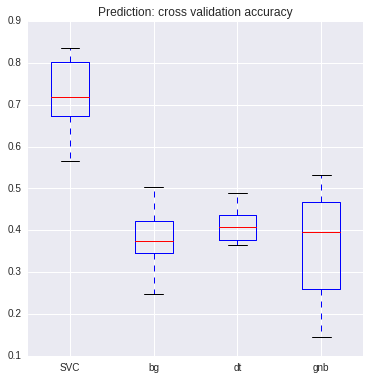

In [101]:
plt.figure(figsize=(6, 6))
plt.boxplot([cv_score_SVC, cv_score_bg, cv_score_dt, cv_score_gnb])
plt.xticks([1,2,3,4], ['SVC', 'bg', 'dt', 'gnb'])
plt.title('Prediction: cross validation accuracy')

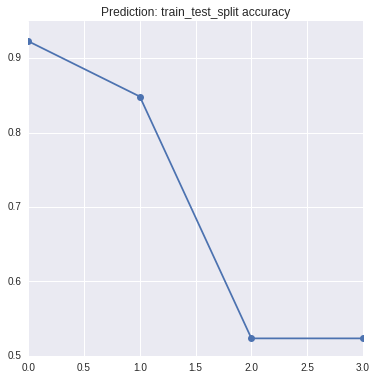

In [110]:
plt.figure(figsize=(6, 6))
plt.plot([ts_score_SVC, ts_score_bg, ts_score_dt, ts_score_gnb], marker='o')
#plt.xticks([1,2,3,4], ['SVC', 'bg', 'dt', 'gnb'])
plt.title('Prediction: train_test_split accuracy')